In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [16]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
# Model Building
# Sequential Model
model = Sequential()
# Convolution activation block
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# Convolution activation block
model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation('relu'))

# Maximum Pooling - fully connected with dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolution activation block
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding='same'))
model.add(Activation('relu'))

# Convolution activation block
model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(Activation('relu'))

# Maximum Pooling - fully connected with dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fllatten :: to be input of fully connected neural network
model.add(Flatten())

# Fully connected (512 neurons) - Activation (relu) - Dropout(0.5)
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer :: full connected with 10 classes output
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [21]:
# Model compiling
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [22]:
# Feature Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [23]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs)

W1224 19:59:54.113759 15020 deprecation.py:323] From C:\Users\Ahmed.Abuelkhir\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
50000/50000 [==============================] - 227s 5ms/step - loss: 1.8466 - acc: 0.3213
Epoch 2/100
50000/50000 [==============================] - 210s 4ms/step - loss: 1.5049 - acc: 0.4541
Epoch 3/100
50000/50000 [==============================] - 221s 4ms/step - loss: 1.3629 - acc: 0.5134 3s - lo
Epoch 4/100
50000/50000 [==============================] - 452s 9ms/step - loss: 1.2634 - acc: 0.5498
Epoch 5/100
50000/50000 [==============================] - 369s 7ms/step - loss: 1.1904 - acc: 0.5788
Epoch 6/100
50000/50000 [==============================] - 357s 7ms/step - loss: 1.1278 - acc: 0.6013
Epoch 7/100
50000/50000 [==============================] - 340s 7ms/step - loss: 1.0769 - acc: 0.6212
Epoch 8/100
50000/50000 [==============================] - 379s 8ms/step - loss: 1.0306 - acc: 0.6378
Epoch 9/100
50000/50000 [==============================] - 377s 8ms/step - loss: 0.9902 - acc: 0.6505
Epoch 10/100
50000/50000 [==============================] - 360s 7ms/step 

In [24]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at D:\Cifar10 - CNN\saved_models\keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 9s 906us/step
Test loss: 0.6560985964298248
Test accuracy: 0.7895


In [47]:
# Define a function for viewing the image
def view_image(subset, i):
    """
    subset : x data for train or test [x_train | x_test ]
    i : index of image
    """
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (2,2)
    from PIL import Image
    return plt.imshow(Image.fromarray(subset[i]), interpolation='nearest')

In [26]:
# Load the saved model 
from keras.models import load_model
saved_model = load_model('saved_models/keras_cifar10_trained_model.h5')

In [31]:
# Predict calsses
y_pred = saved_model.predict_classes(x_test)

In [43]:
# Save the result in a dataframe
import pandas as pd 
results = pd.DataFrame({'Index': range(len(y_pred)), 'Actual': [y_test[i] for i in range(len(y_pred))], 'Predicted': [y_pred[i] for i in range(len(y_pred))]}).set_index('Index')

In [45]:
# View the head 
results.head(10)

,Actual,Predicted
Index,,
0,[3],5
1,[8],9
2,[8],8
3,[0],8
4,[6],8
5,[6],5
6,[1],1
7,[6],9
8,[3],3


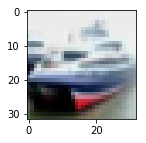

In [51]:
# Explore some images
view_image(x_test, 1)